# Feature Scaling
Standardization and Normalization

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


C:\Users\SONALIMP\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
## Here 'Survived' is the target variable.
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [9]:
df3 = df2.fillna(df2.mean())

In [10]:
X = df3.drop("survived", axis = 1)
y = df3["survived"]
print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [16]:
print("Shape of X_train = ", X_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (712, 3)
Shape of X_test =  (179, 3)
Shape of y_train =  (712,)
Shape of y_test =  (179,)


In [17]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [19]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [20]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [24]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [25]:
X_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [29]:
## Creating DataFrame
X_train_sc = pd.DataFrame(X_train_sc, columns = ["pclass", 'age', 'parch'])
X_test_sc = pd.DataFrame(X_test_sc, columns = ["pclass", 'age', 'parch'])


In [30]:
X_test_sc.head()

,pclass,age,parch
0,-4.565658,-2.212967,-1.109689
1,-1.758380,-2.260365,-1.109689
2,-1.758380,-2.272214,-1.109689
3,-4.565658,-2.273997,-1.109689
4,-3.162019,-2.248515,0.466673


In [32]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,-2.73,-2.27,-0.49
std,1.19,0.08,1.26
min,-4.57,-2.45,-1.11
25%,-3.51,-2.32,-1.11
50%,-1.76,-2.27,-1.11
75%,-1.76,-2.24,-1.11
max,-1.76,-2.03,6.77


In [33]:
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [47]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [48]:
X_train_mmc = pd.DataFrame(X_train_mmc, columns = ["pclass", 'age', 'parch'])
X_test_mmc = pd.DataFrame(X_test_mmc, columns = ["pclass", 'age', 'parch'])


In [49]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


In [53]:
sns.pairplot(X_train)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

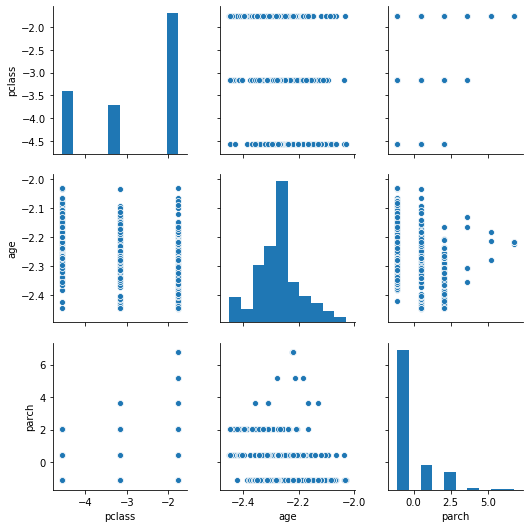

In [51]:
sns.pairplot(X_train_sc)

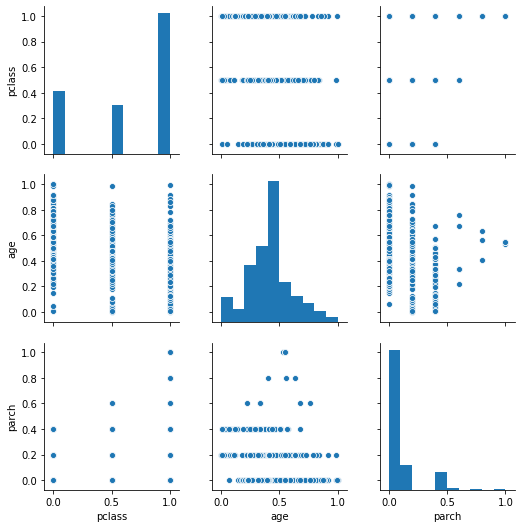

In [54]:
sns.pairplot(X_train_mmc)